In [1]:
#!pip install tensorflow==2.9.1

In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


In [3]:
# Generate train data paths with labels
train_data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
# print(labels)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
344,/kaggle/input/instant-round-27-competition1/Se...,surgeon
345,/kaggle/input/instant-round-27-competition1/Se...,surgeon
346,/kaggle/input/instant-round-27-competition1/Se...,surgeon
347,/kaggle/input/instant-round-27-competition1/Se...,surgeon


In [4]:
# Generate valid data paths with labels
valid_data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/valid'
filepaths = []
labels = []

folds = os.listdir(valid_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(valid_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
# print(labels)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)
valid_df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
130,/kaggle/input/instant-round-27-competition1/Se...,surgeon
131,/kaggle/input/instant-round-27-competition1/Se...,surgeon
132,/kaggle/input/instant-round-27-competition1/Se...,surgeon
133,/kaggle/input/instant-round-27-competition1/Se...,surgeon


In [5]:
# Generate test data paths with labels
test_data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    
        
    filepaths.append(foldpath)
    #labels.append(fold)
# print(labels)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
#Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries], axis= 1)
test_df

,filepaths
0,/kaggle/input/instant-round-27-competition1/Se...
1,/kaggle/input/instant-round-27-competition1/Se...
2,/kaggle/input/instant-round-27-competition1/Se...
3,/kaggle/input/instant-round-27-competition1/Se...
4,/kaggle/input/instant-round-27-competition1/Se...
5,/kaggle/input/instant-round-27-competition1/Se...
6,/kaggle/input/instant-round-27-competition1/Se...
7,/kaggle/input/instant-round-27-competition1/Se...
8,/kaggle/input/instant-round-27-competition1/Se...
9,/kaggle/input/instant-round-27-competition1/Se...


In [6]:
df = pd.concat([train_df,valid_df], axis= 0)
df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
130,/kaggle/input/instant-round-27-competition1/Se...,surgeon
131,/kaggle/input/instant-round-27-competition1/Se...,surgeon
132,/kaggle/input/instant-round-27-competition1/Se...,surgeon
133,/kaggle/input/instant-round-27-competition1/Se...,surgeon


In [7]:
# valid and test dataframe
valid_df, test_df = train_test_split(valid_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [8]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 349 validated image filenames belonging to 7 classes.
Found 67 validated image filenames belonging to 7 classes.
Found 68 validated image filenames belonging to 7 classes.


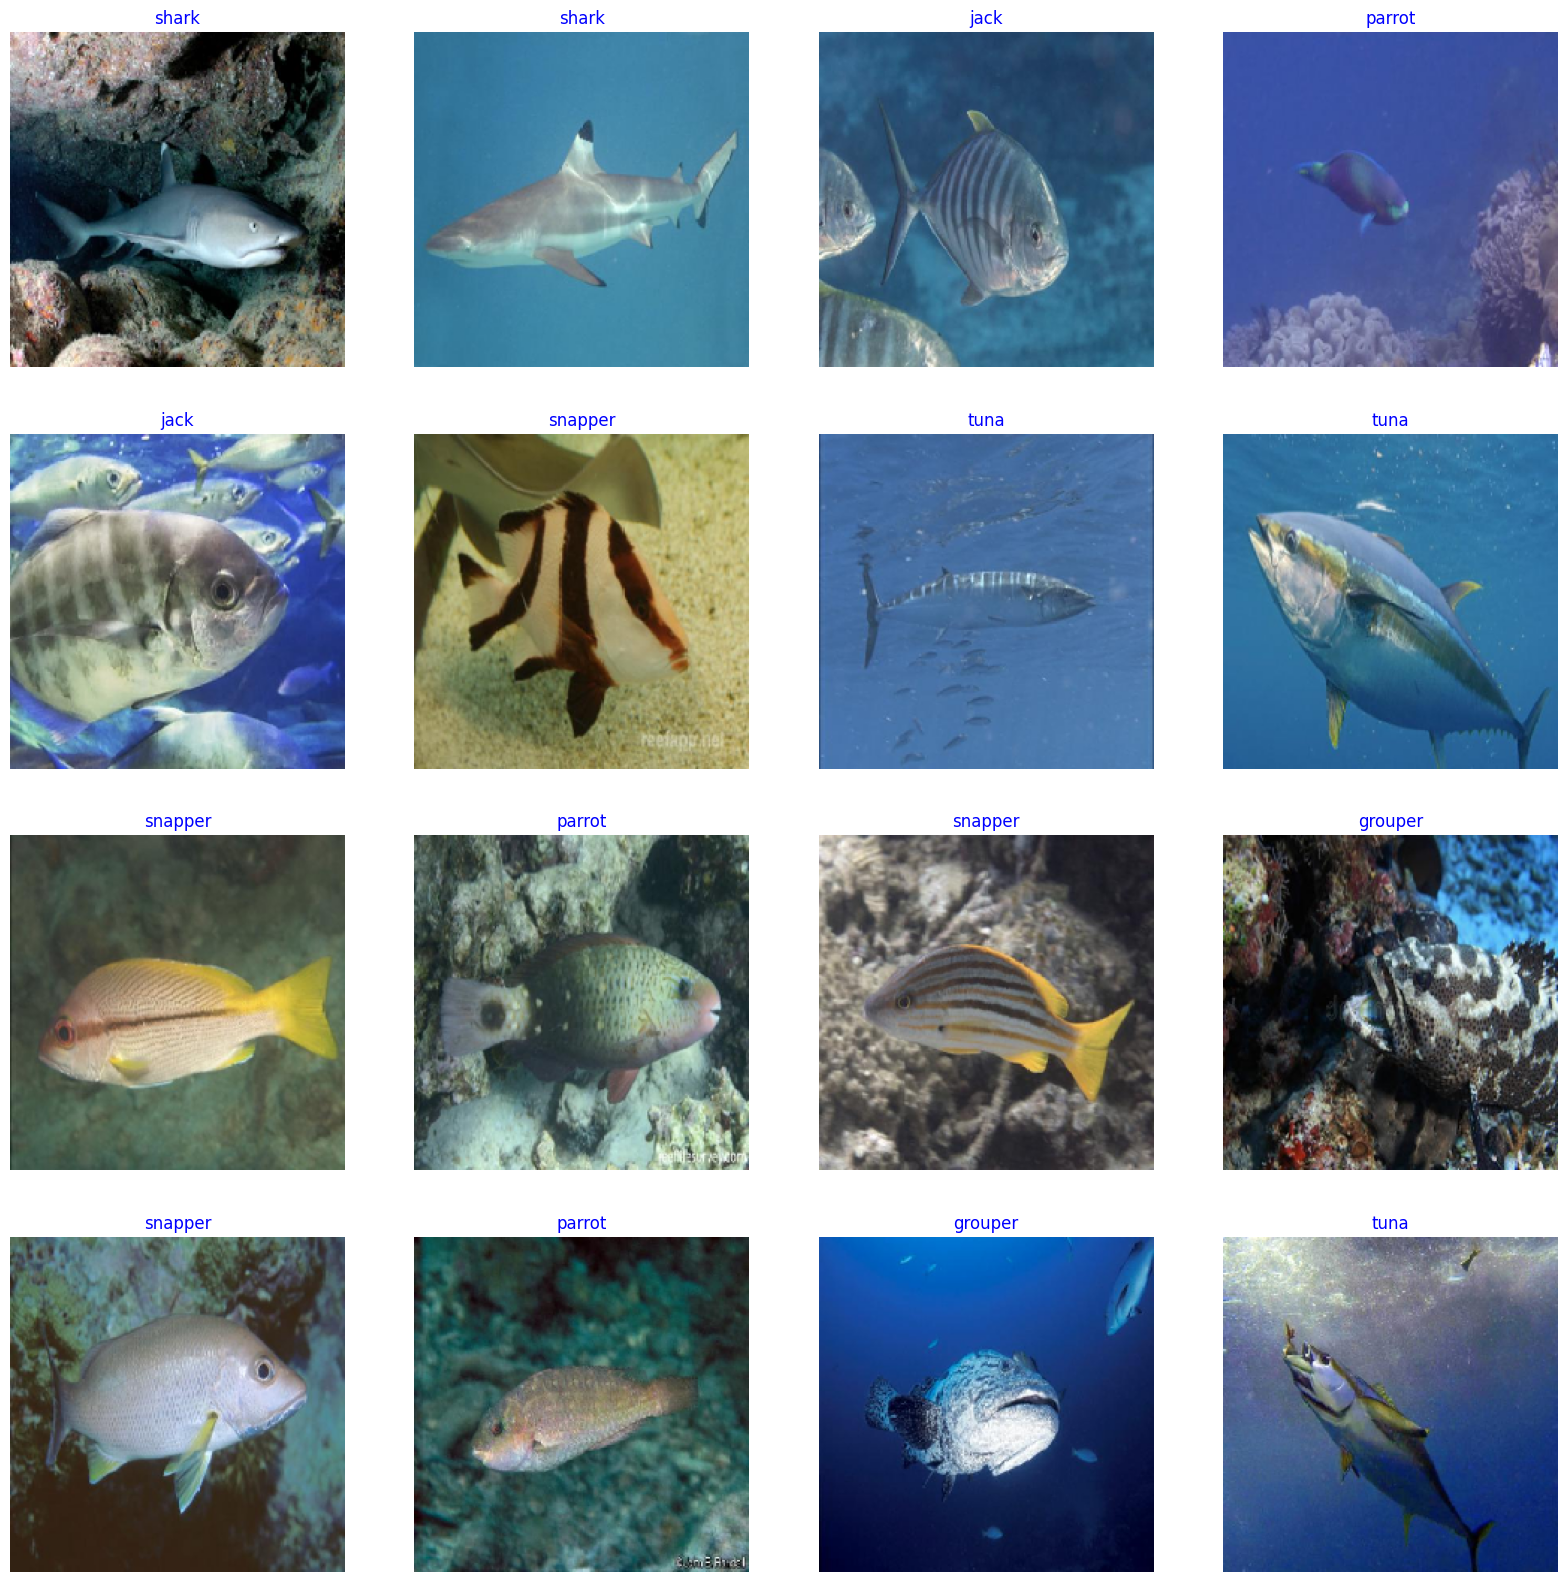

In [9]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [10]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", 
                                                               input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', 
              metrics= ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 
                        tf.keras.metrics.AUC()])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 11,184,950
Trainable params: 11,094,575
Non

In [11]:
epochs = 25   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/25


2023-11-17 12:51:15.424305: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


22/22 [==============================] - 80s 404ms/step - loss: 9.8111 - accuracy: 0.3840 - precision: 0.4565 - recall: 0.3009 - auc: 0.7391 - val_loss: 10.2521 - val_accuracy: 0.4776 - val_precision: 0.5536 - val_recall: 0.4627 - val_auc: 0.8348
Epoch 2/25
22/22 [==============================] - 5s 215ms/step - loss: 8.2035 - accuracy: 0.7937 - precision: 0.8208 - recall: 0.7221 - auc: 0.9600 - val_loss: 8.6737 - val_accuracy: 0.7463 - val_precision: 0.8491 - val_recall: 0.6716 - val_auc: 0.9436
Epoch 3/25
22/22 [==============================] - 5s 214ms/step - loss: 7.5390 - accuracy: 0.9284 - precision: 0.9482 - recall: 0.8911 - auc: 0.9958 - val_loss: 8.0313 - val_accuracy: 0.7910 - val_precision: 0.8889 - val_recall: 0.7164 - val_auc: 0.9548
Epoch 4/25
22/22 [==============================] - 5s 217ms/step - loss: 7.2362 - accuracy: 0.9484 - precision: 0.9701 - recall: 0.9284 - auc: 0.9966 - val_loss: 7.7293 - val_accuracy: 0.7910 - val_precision: 0.8772 - val_recall: 0.7463 - v